In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

ModuleNotFoundError: No module named 'seaborn'

In [2]:
pip install seaborn


     |████████████████████████████████| 292 kB 12.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
iris_data = datasets.load_iris()

NameError: name 'datasets' is not defined

In [6]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [7]:
iris_df = pd.DataFrame(data=np.c_[iris_data['data'],iris_data['target']],columns=iris_data['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
iris_df.shape

(150, 5)

In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
iris_df.target = iris_df.target.astype(int)
iris_df.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Target']
iris_df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Target'], dtype='object')

In [12]:
X = iris_df.iloc[:,:-1].values

In [14]:
#Implementing elbow method for finding optimum value of n_clusters
from sklearn.cluster import KMeans
inertia_scores = []

for k in range(1,9):
  model = KMeans(n_clusters=k,max_iter=400,random_state=42)
  model.fit(X)
  inertia_scores.append(model.inertia_)            

inertia_scores  

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.46949589883803,
 30.186555194805198]

The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:
WCSS= ∑Pi in Cluster1 distance(Pi C1)^2 +∑Pi in Cluster2 distance(Pi C2)^2+∑Pi in CLuster3 distance(Pi C3)^2
In the above formula of WCSS,

∑Pi in Cluster1 distance(Pi C1)2: It is the sum of the square of the distances between each data point and its centroid within a cluster1 and the same for the other two terms.

To measure the distance between data points and centroid, we can use any method such as Euclidean distance or Manhattan distance.

To find the optimal value of clusters, the elbow method follows the below steps:

It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).
For each value of K, calculates the WCSS value.
Plots a curve between calculated WCSS values and the number of clusters K.
The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.
Since the graph shows the sharp bend, which looks like an elbow, hence it is known as the elbow method. The graph for the elbow method looks like the below:

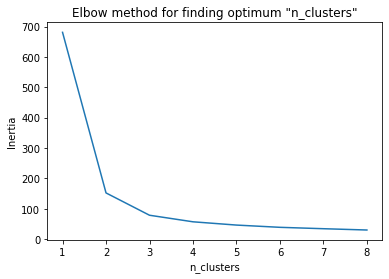

In [15]:
plt.plot(range(1,9),inertia_scores)
plt.xlabel('n_clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for finding optimum "n_clusters"')
plt.show()

In [16]:
#Implementing KMeans, n_clusters=3

model = KMeans(n_clusters=3,max_iter=400,random_state=42)
model.fit(X)
ypred = model.predict(X)

In [17]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

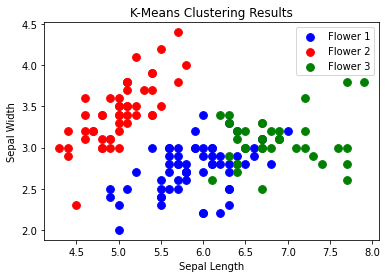

In [22]:
#Visualization

plt.scatter(X[ypred==0,0],X[ypred==0,1],s=60,c='blue',label='Flower 1')
plt.scatter(X[ypred==1,0],X[ypred==1,1],s=60,c='red',label='Flower 2')
plt.scatter(X[ypred==2,0],X[ypred==2,1],s=60,c='green',label='Flower 3') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering Results')

plt.legend()

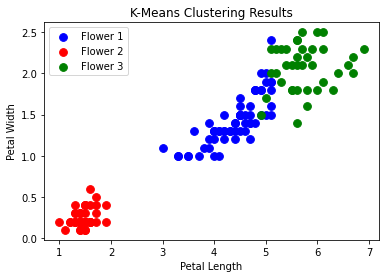

In [19]:
plt.scatter(X[ypred==0,2],X[ypred==0,3],s=60,c='blue',label='Flower 1')
plt.scatter(X[ypred==1,2],X[ypred==1,3],s=60,c='red',label='Flower 2')
plt.scatter(X[ypred==2,2],X[ypred==2,3],s=60,c='green',label='Flower 3')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering Results')

plt.legend()